In [140]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#맑은 고딕 적용
matplotlib.rc('font', family = 'Malgun Gothic')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#분류 NN
from sklearn.neural_network import MLPClassifier

# 분류 knn
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# 서포트 벡터 머신_실습(통신고객이탈)

In [22]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/통신고객이탈.CSV")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [23]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [24]:
# 변수 역할 지정
df_raw_y = df_raw["CHURN"] 
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis = 1, inplace = False)
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "Active", 0, 1)

In [25]:
df_x_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [27]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.791
Accuracy on test set : 0.842


In [11]:
train_accuracy= []
test_accuracy = []
# C 규제 
para_c = [10 ** c for c in range(-2,2)]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Depth"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.791,0.842
2,1.00,0.791,0.842
3,10.00,0.791,0.842


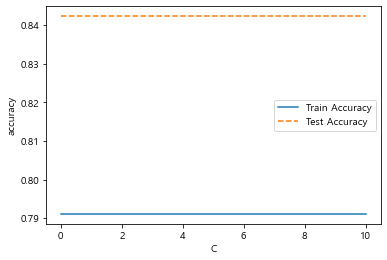

In [12]:
# 모델 설명력 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

In [14]:
train_accuracy= []
test_accuracy = []
# gamma
para_gamma = [10 **gamma for gamma in range(-2,2)]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.842
1,0.10,1.0,0.842
2,1.00,1.0,0.842
3,10.00,1.0,0.842


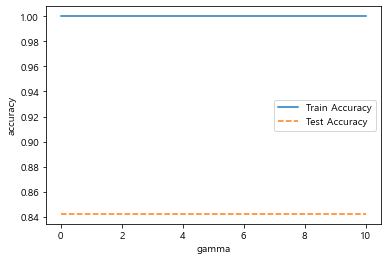

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

In [28]:
#변수 이름 저장
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x_dummy)
df_scaled = pd.DataFrame(df_scaled, columns= v_feature_name)
df_scaled.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424


In [30]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (651, 33)
test data X size : (279, 33)


In [32]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set : 0.916
Accuracy on test set : 0.903


In [152]:
train_accuracy= []
test_accuracy = []
# C 규제 
para_c = [10 ** c for c in range(-2,2)]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.799,0.839
2,1.00,0.916,0.903
3,10.00,0.975,0.885


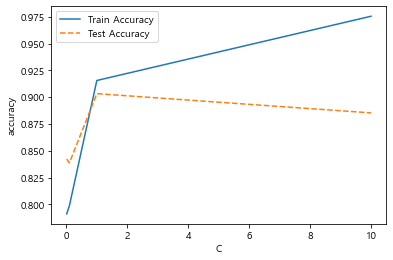

In [38]:
# 모델 설명력 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

In [39]:
train_accuracy= []
test_accuracy = []
# gamma규제 
para_gamma = [10 **gamma for gamma in range(-2,2)]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,0.01,0.903,0.907
1,0.10,0.957,0.896
2,1.00,0.997,0.842
3,10.00,1.000,0.842


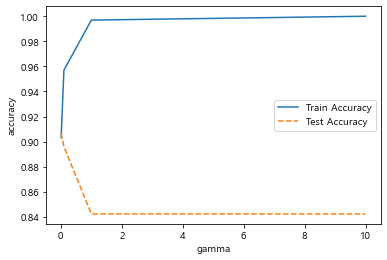

In [40]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

In [41]:
svc_final = SVC(gamma = 0.01, random_state=1234, C =1)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.903
Accuracy on test set : 0.907
Confusion matrix : 
[[228   7]
 [ 19  25]]
              precision    recall  f1-score   support

           0      0.923     0.970     0.946       235
           1      0.781     0.568     0.658        44

    accuracy                          0.907       279
   macro avg      0.852     0.769     0.802       279
weighted avg      0.901     0.907     0.901       279



In [42]:
# GridSearchCV를 이용한 최적 parameter 찾기

estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,"gamma": para_gamma}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))


best estimator model: 
SVC(C=10, gamma=0.01, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.903


# 인공신경망_실습(통화고객이탈)

In [102]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/통신고객이탈.CSV")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [103]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [104]:
# 변수 역할 지정
df_raw_y = df_raw["CHURN"] 
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis = 1, inplace = False)
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "Active", 0, 1)

In [105]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [106]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.831
Accuracy on test set : 0.806


In [107]:
train_accuracy= []
test_accuracy = []
# hidden_layer 은닉층 변경  / 은닉층 1개
para_hidden = [20 * hidden for hidden in range(1,9)] 

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.820,0.875
1,40,0.822,0.860
2,60,0.776,0.699
3,80,0.843,0.835
4,100,0.831,0.806
5,120,0.774,0.756
6,140,0.802,0.753
7,160,0.759,0.659


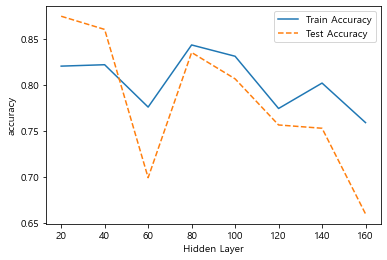

In [108]:
# 모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

In [109]:
train_accuracy= []
test_accuracy = []
# hidden_layer 은닉층 변경  / 은닉층 2개
para_hidden = [20 * hidden for hidden in range(1,9)] 

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.797,0.810
1,40,0.393,0.333
2,60,0.421,0.405
3,80,0.802,0.832
4,100,0.327,0.283
5,120,0.800,0.839
6,140,0.810,0.814
7,160,0.215,0.161


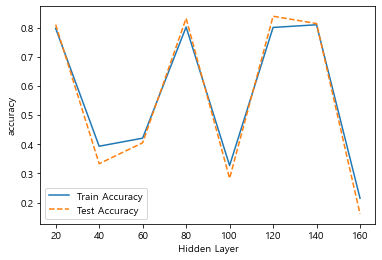

In [110]:
# 모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

In [111]:
train_accuracy= []
test_accuracy = []
# activaiton 변경  
para_function = ['logistic', 'tanh','relu'] 

for v_function in para_function:
    nn = MLPClassifier(activation= v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.831,0.835
1,tanh,0.829,0.828
2,relu,0.831,0.806


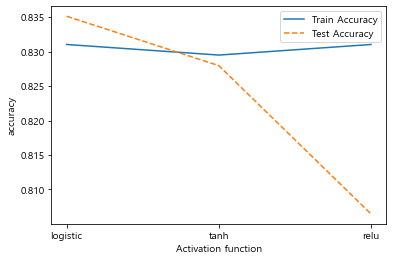

In [112]:
# 모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Activation function')
plt.legend()

In [113]:
#변수 이름 저장
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x_dummy)
df_scaled = pd.DataFrame(df_scaled, columns= v_feature_name)
df_scaled.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424


In [114]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (651, 33)
test data X size : (279, 33)


In [115]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training setㅁ : {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set : 0.974
Accuracy on test set : 0.903


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [116]:
train_accuracy= []
test_accuracy = []
# hidden layer size 변경
para_hidden = [20 * hidden for hidden in range(1,11)] 

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.805,0.864
1,40,0.727,0.720
2,60,0.456,0.394
3,80,0.485,0.419
4,100,0.790,0.789
5,120,0.550,0.484
6,140,0.708,0.713
7,160,0.785,0.803
8,180,0.862,0.885
9,200,0.846,0.839


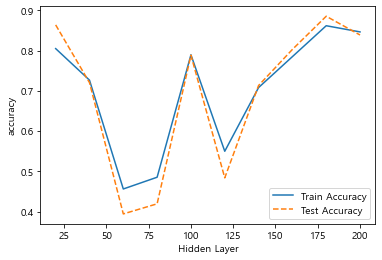

In [117]:
# 모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

In [118]:
train_accuracy= []
test_accuracy = []
# activaiton 은닉층 변경 
para_function = ['logistic', 'tanh','relu'] 

for v_function in para_function:
    nn = MLPClassifier(activation= v_function, hidden_layer_sizes=(180,180), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.909,0.914
1,tanh,1.000,0.885
2,relu,1.000,0.878


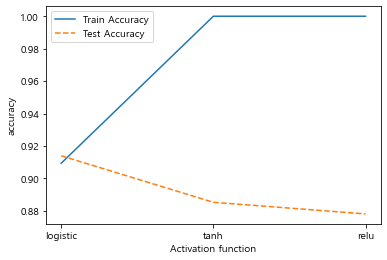

In [119]:
# 모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Activation function')
plt.legend()

In [120]:
train_accuracy= []
test_accuracy = []
# solver 변경 
para_solver = ['lbfgs', 'sgd','adam'] 

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation= 'logistic', hidden_layer_sizes=(180,180), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["solver"] = para_solver
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

,solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.889
1,sgd,0.791,0.842
2,adam,0.909,0.914


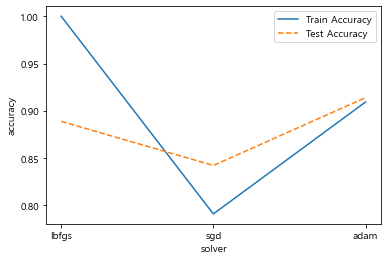

In [121]:
# 모델 설명력 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('solver')
plt.legend()

In [122]:
train_accuracy= []
test_accuracy = []
# mini batch 변경 
para_batch = [20 * batch for batch in range(1,10)] 

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', 
                       activation= 'logistic', hidden_layer_sizes=(180,180), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Mini batch,TrainAccuracy,TestAccuracy
0,20,0.905,0.914
1,40,0.925,0.903
2,60,0.911,0.910
3,80,0.906,0.910
4,100,0.909,0.910
5,120,0.909,0.910
6,140,0.909,0.910
7,160,0.911,0.914
8,180,0.916,0.910


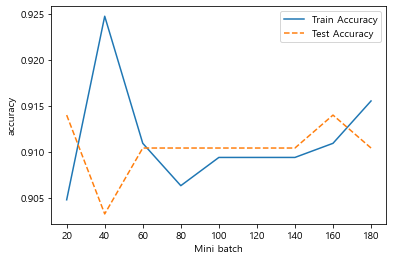

In [123]:
# 모델 설명력 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Mini batch')
plt.legend()

In [92]:
nn_final =MLPClassifier(batch_size = 160, solver = 'adam', 
                       activation= 'logistic', hidden_layer_sizes=(180,180), random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.911
Accuracy on test set : 0.914
Confusion matrix : 
[[228   7]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.931     0.970     0.950       235
           1      0.794     0.614     0.692        44

    accuracy                          0.914       279
   macro avg      0.862     0.792     0.821       279
weighted avg      0.909     0.914     0.909       279



# KNN

In [94]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/통신고객이탈.CSV")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [95]:
# 변수 역할 지정
df_raw_y = df_raw["CHURN"] 
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis = 1, inplace = False)
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "Active", 0, 1)

In [96]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [100]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.820
Accuracy on test set : 0.803


In [125]:
train_accuracy= []
test_accuracy = []
# 최대 이웃 수 : 1~15
para_n_neighbors = [i for i in range(1,6)] 

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.717
1,2,0.851,0.821
2,3,0.843,0.792
3,4,0.825,0.821
4,5,0.820,0.803


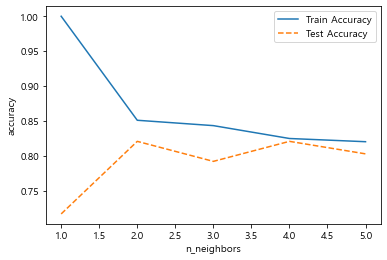

In [126]:
# 모델 설명력 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#4로 결정

In [135]:
train_accuracy= []
test_accuracy = []
para_neighbors = [i for i in range(1,11)]*2

para_weights = (["uniform"])*10 + (["distance"])*10

for (v_n_neighbors, v_weights) in zip(para_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.717
1,2,uniform,0.851,0.821
2,3,uniform,0.843,0.792
3,4,uniform,0.825,0.821
4,5,uniform,0.820,0.803
5,6,uniform,0.822,0.839
6,7,uniform,0.819,0.828
7,8,uniform,0.806,0.835
8,9,uniform,0.810,0.832
9,10,uniform,0.805,0.839


In [136]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',
                                                     values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.716846  0.716846
2                   1.0  0.850998     0.716846  0.820789
3                   1.0  0.843318     0.788530  0.792115
4                   1.0  0.824885     0.777778  0.820789
5                   1.0  0.820276     0.802867  0.802867
6                   1.0  0.821813     0.802867  0.838710
7                   1.0  0.818740     0.817204  0.827957
8                   1.0  0.806452     0.810036  0.835125
9                   1.0  0.809524     0.820789  0.831541
10                  1.0  0.804916     0.827957  0.838710

In [138]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
ㅋ
df_accuracy_weights_pivot.columns = level0 + '-' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy-distance,TrainAccuracy-uniform,TestAccuracy-distance,TestAccuracy-uniform
Neighbors,,,,
1,1.0,1.000000,0.716846,0.716846
2,1.0,0.850998,0.716846,0.820789
3,1.0,0.843318,0.788530,0.792115
4,1.0,0.824885,0.777778,0.820789
5,1.0,0.820276,0.802867,0.802867


<AxesSubplot:xlabel='Neighbors'>

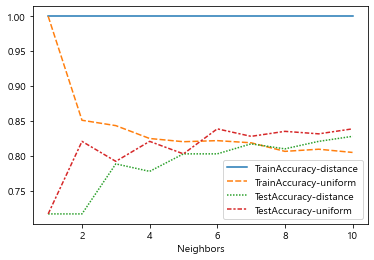

In [141]:
sns.lineplot(data = df_accuracy_weights_pivot)

# uniform 으로 결정

In [149]:
train_accuracy= []
test_accuracy = []
para_neighbors = [i for i in range(1,11)]*3

para_metric = (["minkowski"])*10 + (["euclidean"])*10 + (["manhattan"])*10

for (v_n_neighbors, v_metric) in zip(para_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.717
1,2,minkowski,0.851,0.821
2,3,minkowski,0.843,0.792
3,4,minkowski,0.825,0.821
4,5,minkowski,0.820,0.803
5,6,minkowski,0.822,0.839
6,7,minkowski,0.819,0.828
7,8,minkowski,0.806,0.835
8,9,minkowski,0.810,0.832
9,10,minkowski,0.805,0.839


<AxesSubplot:xlabel='Neighbors'>

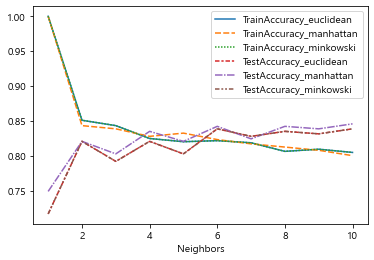

In [150]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_metric_pivot
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

sns.lineplot(data=df_accuracy_metric_pivot)
# manhattan 으로 결정

In [151]:
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
print("Accuracy on training set : {:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 0.825
Accuracy on test set : 0.821
Confusion matrix : 
[[227   8]
 [ 42   2]]
              precision    recall  f1-score   support

           0      0.844     0.966     0.901       235
           1      0.200     0.045     0.074        44

    accuracy                          0.821       279
   macro avg      0.522     0.506     0.487       279
weighted avg      0.742     0.821     0.770       279

